<a href="https://colab.research.google.com/github/Code-With-aashi/Face-Recognition/blob/main/Masked_Faced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U git+https://github.com/paoloripamonti/face-recognition.git

  Cloning https://github.com/paoloripamonti/face-recognition.git to /tmp/pip-req-build-z5snbvyo
  Running command git clone -q https://github.com/paoloripamonti/face-recognition.git /tmp/pip-req-build-z5snbvyo
     |████████████████████████████████| 2.3 MB 11.3 MB/s 
     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 2.9 MB 41.1 MB/s 
     |████████████████████████████████| 3.8 MB 32.9 MB/s 
     |████████████████████████████████| 462 kB 26.3 MB/s 
  Created wheel for facenet-face-recognition: filename=facenet_face_recognition-0.2-py3-none-any.whl size=5940 sha256=793a039a9c4c46106c8f5bd95663c84eb74c8684a551b811fb8a25f8dba05c29
  Stored in directory: /tmp/pip-ephem-wheel-cache-p0rfftc2/wheels/6d/08/c9/db08935b14bdf518637a7805bc56687ab1997fa9612948491e
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10386 sha256=58d5b0dc89ae8586f26723ebdc0cf69c7b5cd57427406f59436923b049309e6f
  Stored in directory: /roo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Archive-file.zip

Streaming output truncated to the last 5000 lines.
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0210.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0211.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0212.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0213.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0214.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0216.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0217.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0218.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0219.jpg  
  inflating: Archive-file/AFDB_face_dataset/AFDB_face_dataset/wangyu/1_0_wangyu_0220.jpg  
  inflating: Archive-file/AFDB_face_dat

In [ ]:
from face_recognition import FaceRecognition

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random
import numpy as np
import cv2
import base64
from tqdm import tqdm
import requests
from pprint import pprint

In [ ]:
ROOT_Train =  "/content/Archive-file/AFDB_face_dataset/AFDB_face_dataset"

In [ ]:
train = []
for path in glob.iglob(os.path.join(ROOT_Train, "**", "*.jpg")):
    person = path.split("/")[-2]
    train.append({"person":person, "path": path})
    
train = pd.DataFrame(train)
train = train.groupby("person").filter(lambda x: len(x) > 5)
train.head(10)

,person,path
0,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
1,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
2,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
3,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
4,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
5,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
6,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
7,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
8,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...
9,wanghan,/content/Archive-file/AFDB_face_dataset/AFDB_f...


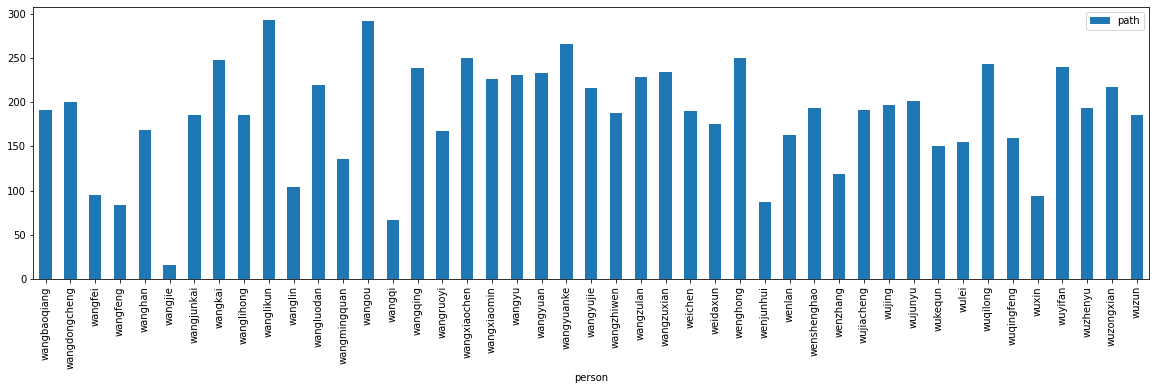

In [ ]:
train.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

In [ ]:
print("number of person in train dataset : %s" %(len(train.groupby("person"))))
print("number of image in train dataset : %s" %(len(train)))

number of person in train dataset : 45
number of image in train dataset : 8373


In [ ]:
trainx, valid = train_test_split(train, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
print("number of person in train dataset : %s" %(len(trainx.groupby("person"))))
print("number of image in train dataset : %s" %(len(trainx)))
print("number of person in validation dataset : %s" %(len(valid.groupby("person"))))
print("number of image in validation dataset : %s" %(len(valid)))

number of person in train dataset : 45
number of image in train dataset : 5861
number of person in validation dataset : 45
number of image in validation dataset : 2512


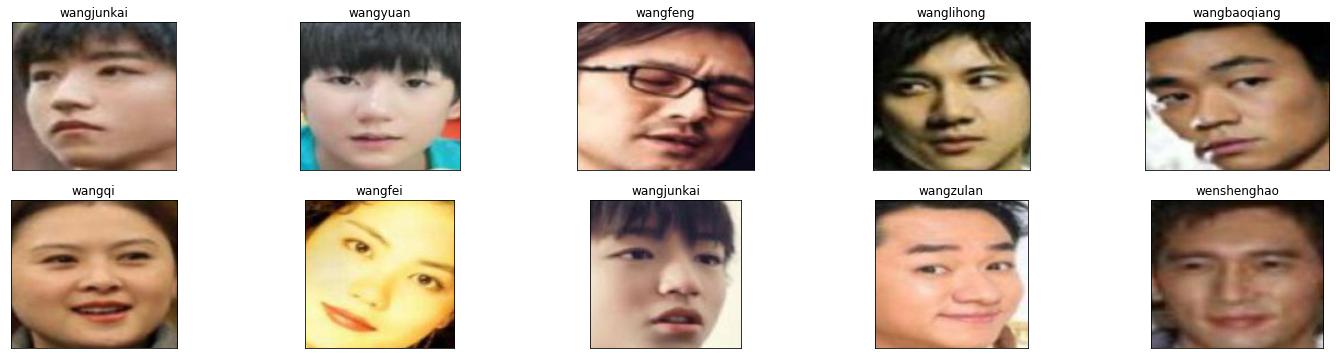

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
    idx = random.randint(0, len(train))
    img = plt.imread(train.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(train.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
ROOT_Test = "/content/Archive-file/AFDB_masked_face_dataset/AFDB_masked_face_dataset"

In [ ]:
test = []
for path in glob.iglob(os.path.join(ROOT_Test, "**", "*.jpg")):
    person = path.split("/")[-2]
    test.append({"person":person, "path": path})

test = pd.DataFrame(test)
test = test.groupby("person").filter(lambda x: len(x) > 0)
test.head(10)

,person,path
0,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
1,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
2,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
3,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
4,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
5,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
6,weidaxun,/content/Archive-file/AFDB_masked_face_dataset...
7,wuxin,/content/Archive-file/AFDB_masked_face_dataset...
8,wuxin,/content/Archive-file/AFDB_masked_face_dataset...
9,wuxin,/content/Archive-file/AFDB_masked_face_dataset...


In [ ]:
len(test.groupby("person"))

31

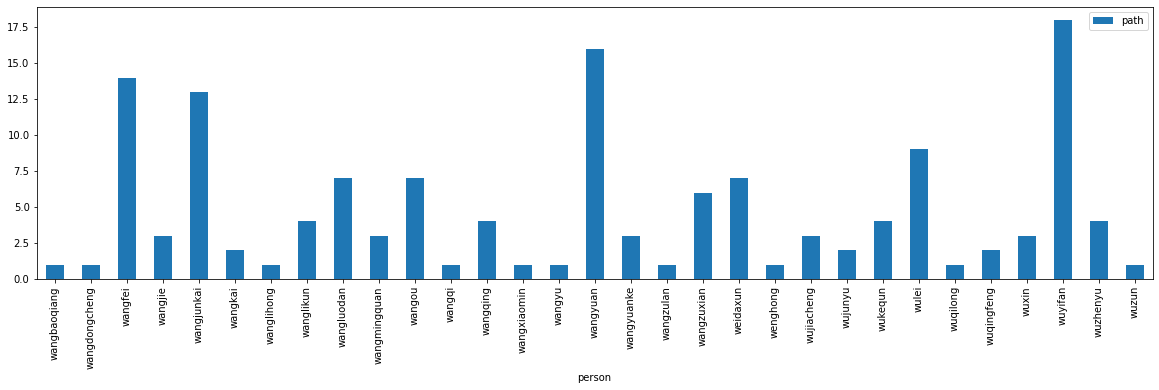

In [ ]:
test.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

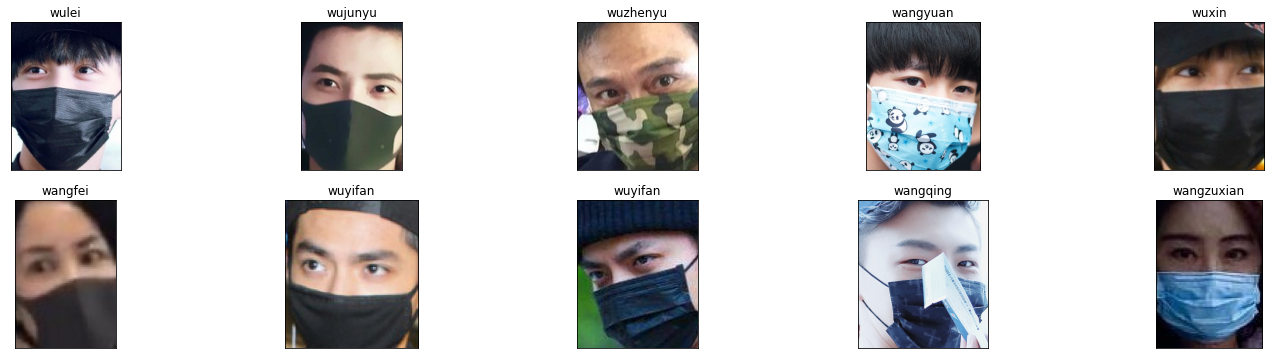

In [ ]:
plt.figure(figsize=(20,10))
for i in range(10):
    idx = random.randint(0, len(test))
    img = plt.imread(test.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(test.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
%%time
fr = FaceRecognition()

CPU times: user 4.41 s, sys: 803 ms, total: 5.21 s
Wall time: 6.99 s


In [ ]:
%%time
fr.fit_from_dataframe(trainx)

  0%|          | 0/5861 [00:00<?, ?it/s]

100%|██████████| 5861/5861 [42:45<00:00,  2.28it/s]

CPU times: user 41min 30s, sys: 1min 39s, total: 43min 10s
Wall time: 42min 45s


In [ ]:
fr.save('masked_unmasked_model.pkl')

In [ ]:
%%time
valid_test, valid_pred, valid_scores = [],[],[]
for idx in tqdm(range(len(valid))):
    path = valid.path.iloc[idx]
    result = fr.predict(path)
    for prediction in result["predictions"]:
        valid_pred.append(prediction["person"])
        valid_scores.append(prediction["confidence"])
        valid_test.append(valid.person.iloc[idx])

100%|██████████| 2512/2512 [19:34<00:00,  2.14it/s]

CPU times: user 19min 28s, sys: 4min 47s, total: 24min 16s
Wall time: 19min 34s


In [ ]:
%%time
y_test, y_pred, y_scores = [],[],[]
for idx in tqdm(range(len(test))):
    path = test.path.iloc[idx]
    result = fr.predict(path)
    for prediction in result["predictions"]:
        y_pred.append(prediction["person"])
        y_scores.append(prediction["confidence"])
        y_test.append(test.person.iloc[idx])

100%|██████████| 144/144 [01:07<00:00,  2.12it/s]

CPU times: user 1min 7s, sys: 7.49 s, total: 1min 14s
Wall time: 1min 7s


In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

      UNKNOWN       0.00      0.00      0.00         0
 wangbaoqiang       0.00      0.00      0.00         0
wangdongcheng       0.00      0.00      0.00         1
      wangfei       1.00      0.78      0.88         9
      wanghan       0.00      0.00      0.00         0
      wangjie       1.00      0.33      0.50         3
   wangjunkai       0.33      1.00      0.50         1
   wanglihong       0.00      0.00      0.00         1
    wanglikun       0.00      0.00      0.00         0
 wangmingquan       0.00      0.00      0.00         2
       wangou       0.00      0.00      0.00         2
       wangqi       0.00      0.00      0.00         1
     wangqing       0.00      0.00      0.00         0
  wangxiaomin       0.00      0.00      0.00         0
       wangyu       0.00      0.00      0.00         1
     wangyuan       0.00      0.00      0.00         3
   wangyuanke       0.50      0.50      0.50         2
    wangz

In [ ]:
print("Train Accuracy: %f" % accuracy_score(valid_test, valid_pred))

Train Accuracy: 0.936998


In [ ]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred))

Accuracy: 0.392857


0.0


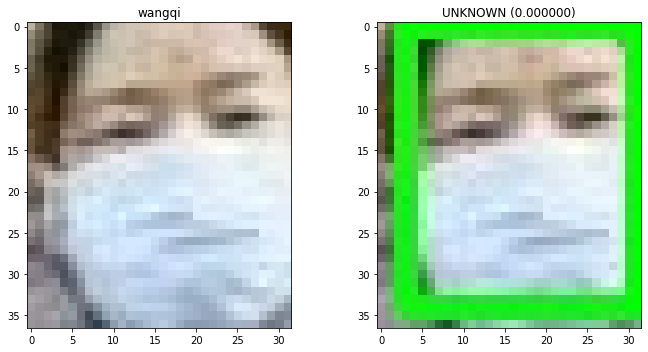

In [ ]:
person = "wangqi"
path = test[test.person==person]["path"].iloc[0]
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(person)
plt.subplot(1, 2, 2)
plt.imshow(output)
print(result["predictions"][0]["confidence"])
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()
plt.show()

0.6457276344299316


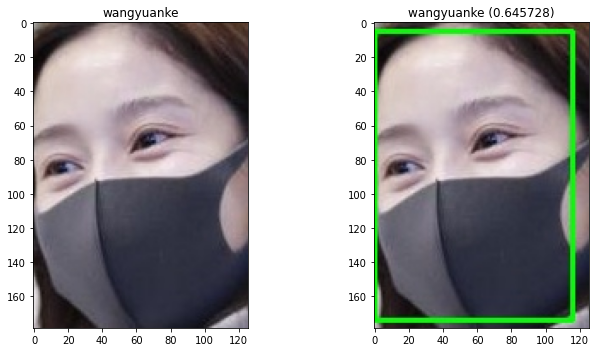

In [ ]:
person = y_test[12]
path = test[test.person==person]["path"].iloc[0]
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(person)
plt.subplot(1, 2, 2)
plt.imshow(output)
print(result["predictions"][0]["confidence"])
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()
plt.show()

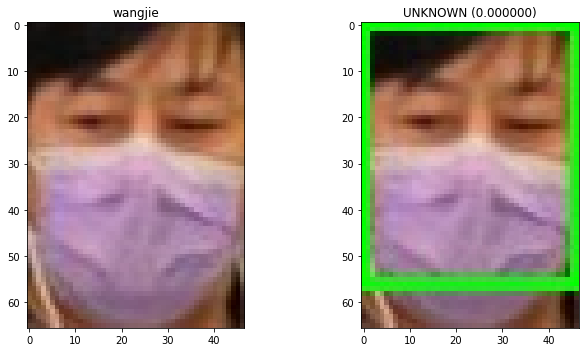

In [ ]:
person = y_test[3]
path = test[test.person==person]["path"].iloc[0]
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(person)
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()
plt.show()

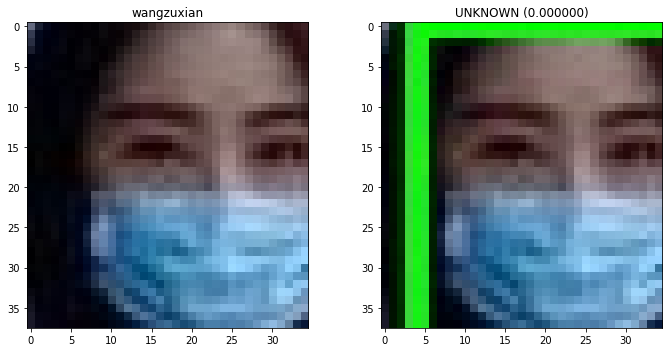

In [ ]:
person = y_test[9]
path = test[test.person==person]["path"].iloc[0]
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(person)
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()
plt.show()